<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

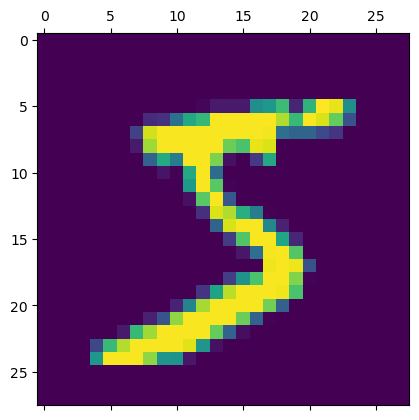

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4685 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2670 - accuracy: 0.9248


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.9267


[0.2676982879638672, 0.9266999959945679]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.2573235e-02, 2.0732263e-07, 5.3332072e-02, 9.4597656e-01,
       2.6949919e-03, 9.1999292e-02, 5.9886850e-07, 9.9972665e-01,
       1.2640639e-01, 5.9166539e-01], dtype=float32)

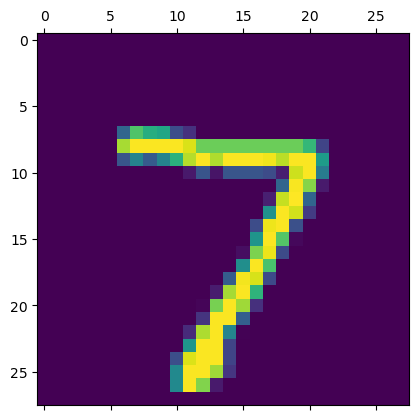

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    4,    3,    1,    0],
       [   0, 1111,    4,    2,    0,    1,    3,    2,   12,    0],
       [   4,    7,  936,   15,    8,    2,   11,    9,   36,    4],
       [   3,    0,   23,  916,    1,   22,    2,    9,   26,    8],
       [   1,    1,    6,    1,  920,    0,   10,    4,   11,   28],
       [   9,    2,    7,   33,   10,  770,   10,    5,   38,    8],
       [  13,    3,    8,    1,    7,   12,  906,    2,    6,    0],
       [   1,    5,   26,    5,    8,    0,    0,  948,    4,   31],
       [   7,    6,    7,   15,    9,   19,    8,    9,  887,    7],
       [  11,    7,    1,    9,   36,    6,    0,   18,   11,  910]])>

Text(95.72222222222221, 0.5, 'Truth')

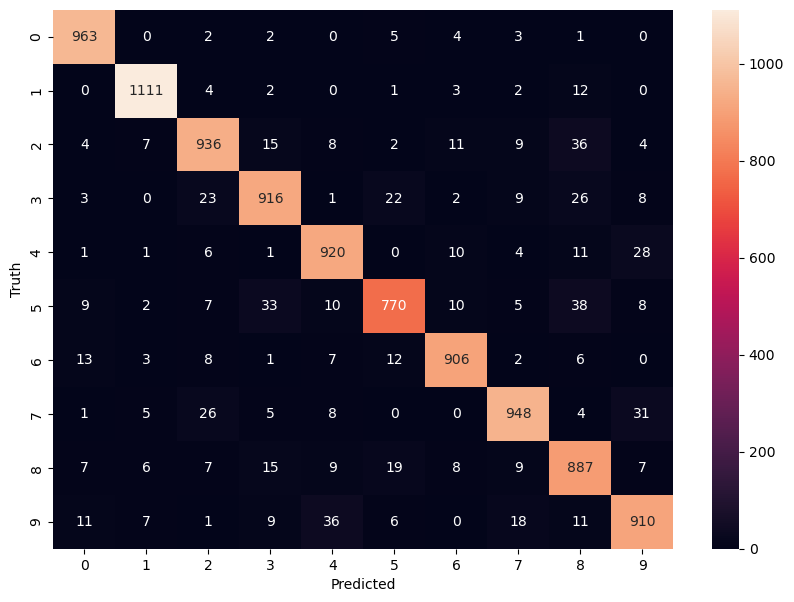

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2718 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1222 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0851 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0644 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0503 - accuracy: 0.9842


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9742


[0.08264032006263733, 0.9742000102996826]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

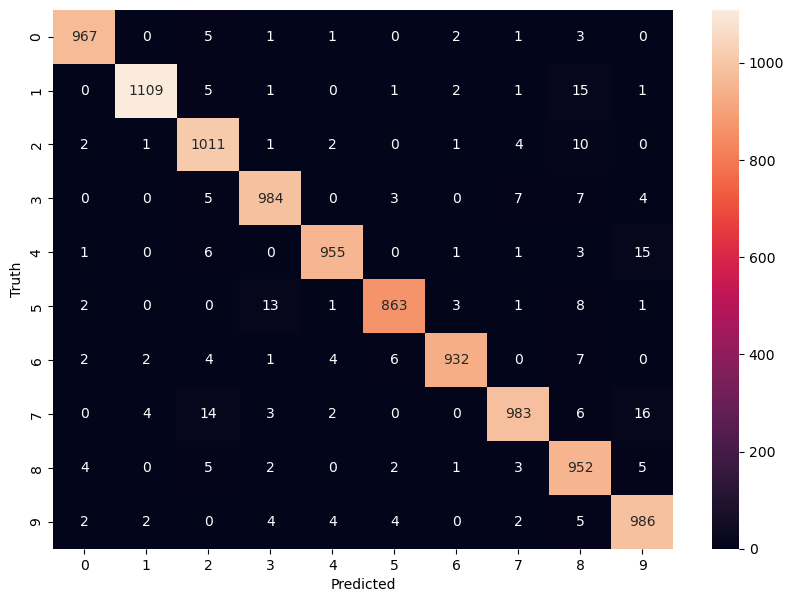

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2726 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1256 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0871 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0671 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0536 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0431 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0355 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0293 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0250 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.02

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0797 - accuracy: 0.9779


[0.07968630641698837, 0.9779000282287598]